In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [98]:
train = pd.read_csv('train_fuSp8nd.csv')
test =pd.read_csv('test_B0QdNpj.csv')

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
ID       5435 non-null int64
Class    5435 non-null object
dtypes: int64(1), object(1)
memory usage: 85.0+ KB


In [100]:
# train

In [101]:
import librosa
from librosa import display

In [102]:
import glob

In [103]:
from librosa import feature

In [104]:
data , sampling_rate = librosa.load('Train/2022.wav')

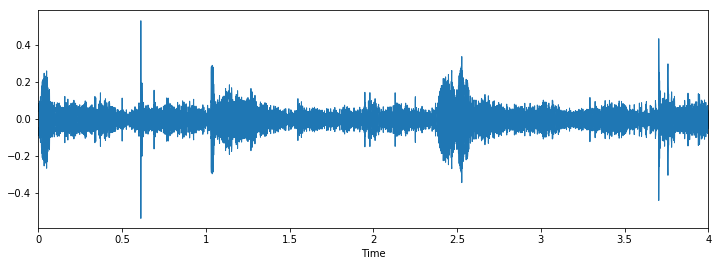

In [105]:
plt.figure(figsize =(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

In [106]:
train.index

RangeIndex(start=0, stop=5435, step=1)

In [107]:
import os

In [108]:
i = np.random.choice(train.index)
audio_name = train.ID[i]

In [109]:
x, sr = librosa.load('Train' + '/' + str(train.ID[i]) + '.wav')  

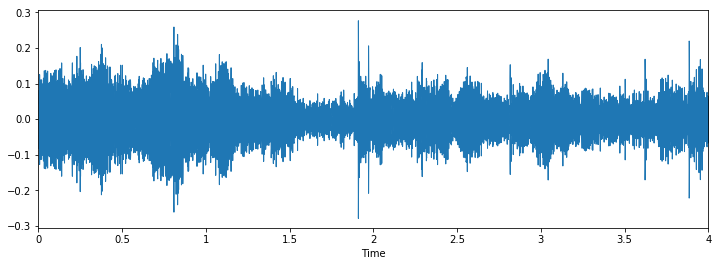

In [110]:
plt.figure(figsize = (12,4))
librosa.display.waveplot(x , sr = sr)

In [111]:
train['Class'].value_counts()/5435

jackhammer          0.122907
engine_idling       0.114811
siren               0.111684
dog_bark            0.110396
children_playing    0.110396
drilling            0.110396
street_music        0.110396
air_conditioner     0.110396
car_horn            0.056302
gun_shot            0.042318
Name: Class, dtype: float64

In [112]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc = 40)
    mfccs_scaled =np.mean(mfccs.T,axis = 0)
    return mfccs_scaled
    

In [113]:
features = []
for i in range(train.shape[0]):
    filepath = 'Train' + '/' + str(train.ID[i]) + '.wav'
    class_label = train.Class[i]
    data = feature_extractor(filepath)
    features.append([data,class_label])
    

In [114]:
df = pd.DataFrame(features , columns = ['feature','class_label'])

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
le = LabelEncoder()

In [118]:
df['class_label'] = le.fit_transform(df['class_label'])

In [119]:
X = np.array(df.feature.tolist())
y = np.array(df.class_label.tolist())

In [176]:
y = tf.keras.utils.to_categorical(y)

In [171]:
# from np_utils import to_categorical


In [170]:
# yy = np_utils.to_categorical(le.fit_transform(y))

In [177]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [178]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4348, 40) (1087, 40) (4348, 10) (1087, 10)


In [134]:
from tensorflow import keras

In [138]:
# from keras import models

In [150]:
# tf.keras.models.Sequential
# from tensorflow import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D

In [144]:
num_labels = y.shape

In [159]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(256,input_shape=(40,),activation = 'relu'),
                            tf.keras.layers.Dense(256,activation = 'relu'),
                            tf.keras.layers.Dense(10,activation = 'softmax')
    
                             ])

In [154]:
# df['class_label'].value_counts()

In [160]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [96]:
# model.summary()

In [93]:
from datetime import datetime 

In [180]:
start = datetime.now()
model.fit(x_train,y_train,batch_size = 32,epochs = 12,validation_data = (x_test,y_test),verbose = 2)
training_duration = datetime.now() - start

Train on 4348 samples, validate on 1087 samples
Epoch 1/12
4348/4348 - 0s - loss: 0.7487 - acc: 0.7721 - val_loss: 0.6998 - val_acc: 0.7764
Epoch 2/12
4348/4348 - 0s - loss: 0.6054 - acc: 0.8107 - val_loss: 0.6805 - val_acc: 0.8096
Epoch 3/12
4348/4348 - 0s - loss: 0.5936 - acc: 0.8169 - val_loss: 0.7162 - val_acc: 0.7626
Epoch 4/12
4348/4348 - 0s - loss: 0.5722 - acc: 0.8169 - val_loss: 0.9406 - val_acc: 0.7314
Epoch 5/12
4348/4348 - 1s - loss: 0.4919 - acc: 0.8436 - val_loss: 0.5473 - val_acc: 0.8353
Epoch 6/12
4348/4348 - 0s - loss: 0.3899 - acc: 0.8721 - val_loss: 0.5076 - val_acc: 0.8565
Epoch 7/12
4348/4348 - 0s - loss: 0.3624 - acc: 0.8811 - val_loss: 0.6356 - val_acc: 0.8298
Epoch 8/12
4348/4348 - 1s - loss: 0.3832 - acc: 0.8797 - val_loss: 0.5097 - val_acc: 0.8528
Epoch 9/12
4348/4348 - 1s - loss: 0.3193 - acc: 0.8937 - val_loss: 0.5137 - val_acc: 0.8565
Epoch 10/12
4348/4348 - 0s - loss: 0.3301 - acc: 0.8924 - val_loss: 0.4599 - val_acc: 0.8648
Epoch 11/12
4348/4348 - 0s - lo